In [32]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

# Introduction to Ensemble Methods

Ensemble methods are techniques for obtaining better predictive performances by using multiple models.

The following dataset comes from a bank which would like to know when a new client arrives if this client will subscribe to a long term deposit.

The bank will be considered as your client in the following parts.

---

**Feel free to create sklearn Pipelines for simplifying the following experiments** 

## Introducing and exploring the dataset

The dataset is located in `../data/bank-full.csv`. It has 17 columns, the target column or $ŷ$ is the column named `y`.

Columns summary  : 

| column name | simple description |
|-------------|------------------------|
| age | age |
| job | type of job |
| marital | marital status |
| education | education level |
| default | has credit in default? |
| balance | average yearly balance, in euros  |
| housing | has housing loan? |
| loan | has personal loan? |
| contact | contact communication |
| month | last contact month of year |
| day_of_week | last contact day of the week |
| duration |  last contact duration in seconds |
| campaign |  number of contacts performed during campaign for this client |
| pday | number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client |
| poutcome | outcome of the previous marketing campaign |
| **output :** |  |
| y | has  the client subscribed a term deposit? |

Let's explore the dataset a bit using pandas.

While exploring the dataset it is recommended to create a list of categorical features

In [2]:
import pandas as pd

Create a dataframe with the dataset `../data/bank-full.csv`

In [13]:
df = pd.read_csv('../data/bank-full.csv', sep=";")

Describe the dataset informations

In [22]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [16]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Use histogramms to display the features' distribution

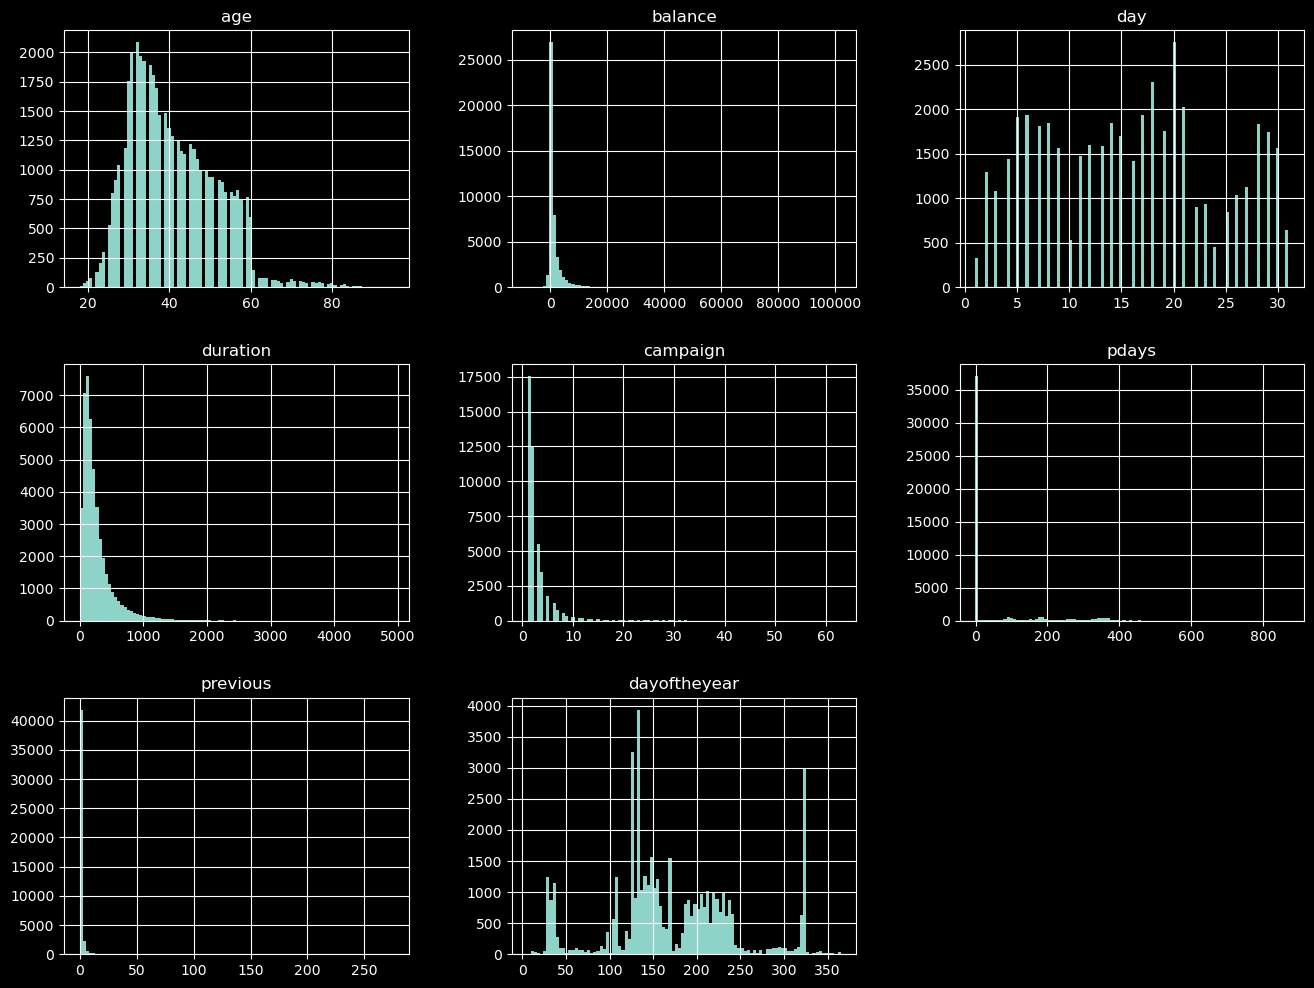

In [116]:
rcParams['figure.figsize'] = 16,12
plots = df.hist(bins=100)

In [117]:
#distribution log-normale (duration)

Use heatmap to display the numerical features' correlation

In [64]:
from sklearn.compose import make_column_selector

numerical_features = make_column_selector(dtype_include=np.number)
numerical_columns = numerical_features(df)
numerical_df = df[numerical_columns]

correlation_matrix = numerical_df.corr()

In [50]:
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


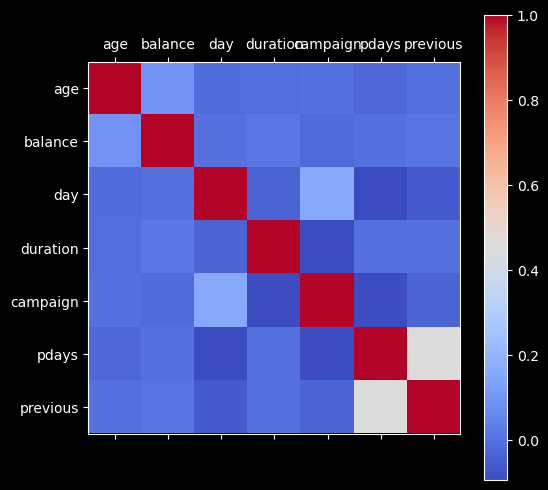

In [66]:
rcParams['figure.figsize'] = 10, 6
plt.matshow(numerical_df.corr(), cmap='coolwarm')
plt.yticks(np.arange(numerical_df.shape[1]), numerical_df.columns)
plt.xticks(np.arange(numerical_df.shape[1]), numerical_df.columns)
plt.colorbar()

In [198]:
numerical_df

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


The date is a strange type of data for machine learning. Think about it. Is the day? the month? the year that are important? Or the relative date for instance in the year?

If the phenomenon occurs seasonally, maybe it is better to look at the day of the year (on 365 days), if it monthly, maybe to look at the day in the month (on approximativally 30, 31 or other for bissextile year), etc... If more complex, well do the propoer hypothesis and test it.

For our problem, we supposed it is better to look at the day of the year. Maybe is good, maybe is wrong. It is an hypothesis we want you to test. So in order to continue the preprocessing, the features `day` and `month` should be merged into one column named `dayoftheyear`.

You can use pandas datetime tools or python datetime librairies for doing this preprocessing.
(the default year used will be 1984)

In [199]:
df['date'] = df['day'].astype(str) + '-' + df['month']

In [201]:
df['date'].info

<bound method Series.info of 0         5-may
1         5-may
2         5-may
3         5-may
4         5-may
          ...  
45206    17-nov
45207    17-nov
45208    17-nov
45209    17-nov
45210    17-nov
Name: date, Length: 45211, dtype: object>

In [202]:
df['date'] = pd.to_datetime(df['date'], format='%d-%b')

In [203]:
df['dayoftheyear'] = df['date'].dt.dayofyear

In [204]:
df['dayoftheyear']

0        125
1        125
2        125
3        125
4        125
        ... 
45206    321
45207    321
45208    321
45209    321
45210    321
Name: dayoftheyear, Length: 45211, dtype: int32

In [205]:
df_clean = df

In [206]:
df_clean.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'dayoftheyear', 'date'],
      dtype='object')

In [207]:
df_clean = df_clean.drop(['contact', 'day','month', 'poutcome', 'duration', 'date'], axis=1)
df_clean


,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,y,dayoftheyear
0,58,management,married,tertiary,no,2143,yes,no,1,-1,0,no,125
1,44,technician,single,secondary,no,29,yes,no,1,-1,0,no,125
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,-1,0,no,125
3,47,blue-collar,married,unknown,no,1506,yes,no,1,-1,0,no,125
4,33,unknown,single,unknown,no,1,no,no,1,-1,0,no,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,3,-1,0,yes,321
45207,71,retired,divorced,primary,no,1729,no,no,2,-1,0,yes,321
45208,72,retired,married,secondary,no,5715,no,no,5,184,3,yes,321
45209,57,blue-collar,married,secondary,no,668,no,no,4,-1,0,no,321


We cannot treat the same way categories with numerical features. So let's make two different lists and different treatments. Now sort the features into categorical and numerical features

In [260]:
#categorical_features = [] # to be completed
categorical_features = make_column_selector(dtype_exclude=np.number)

#numerical_features = [] # to be completed
numerical_features = make_column_selector(dtype_include=np.number)


After a first exploration, categorical/ordinal features (10 columns) need to be encoded in order to become a valid input for the modeling phase. ML manipulates figures, not string, not category by itself.

Look at the encoder to *encode* your *categorical data*. The different encoders can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

(You can also use the function `get_dummies` of pandas for categorical features)

In [276]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [341]:
# Create the X and y DataFrames resample the dataframes if necessary
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

y = df_clean['y']
X = df_clean.drop('y', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(y_train.value_counts())
print(y_test.value_counts())

y
no     31937
yes     4231
Name: count, dtype: int64
y
no     7985
yes    1058
Name: count, dtype: int64


In [342]:
# import and create the appropriate encoders 
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())

In [343]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                      (categorical_pipeline, categorical_features))

In [344]:
X_train_pipe = preprocessor.fit_transform(X_train)
X_train_pipe

array([[-0.46043404, -0.16441038, -0.24610373, ...,  0.        ,
         1.        ,  0.        ],
       [-1.58964093,  0.89962705,  0.39820171, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.29237054, -0.36548575,  0.39820171, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.38647112, -0.41925793, -0.56825645, ...,  1.        ,
         1.        ,  0.        ],
       [-1.3073392 ,  0.38895426, -0.56825645, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.79797972, -0.28922702, -0.24610373, ...,  0.        ,
         1.        ,  0.        ]])

In [345]:
X_test_pipe = preprocessor.transform(X_test)
X_test_pipe

array([[-0.08403175, -0.23643251, -0.24610373, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.29237054, -0.32181622, -0.24610373, ...,  1.        ,
         1.        ,  0.        ],
       [-0.93093691, -0.32898584,  0.72035444, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.83683634, -0.1308435 , -0.24610373, ...,  1.        ,
         1.        ,  0.        ],
       [-1.96604322, -0.4450034 ,  0.39820171, ...,  0.        ,
         1.        ,  0.        ],
       [-0.17813232, -0.3267046 , -0.56825645, ...,  1.        ,
         0.        ,  1.        ]])

Now, the dataset needs to be split into two sets :
1. one corresponding to $ŷ$ 
2. the other corresponding to the $X$ matrix.

- Prepare the learning dataset

At the end of this part, two dataframes are created :

- `X` containing the features (or the matrix $X$)
- `y` containing the label (or $ŷ$)

Display the shape of X and y

In [346]:
print(f'X_train:', X_train_pipe.shape)
print(f'y_train:', len(y_train))
print(f'X_test:', X_test_pipe.shape)
print(f'y_test:', len(y_test))

X_train: (36168, 31)
y_train: 36168
X_test: (9043, 31)
y_test: 9043


Well done! The data is now ready to be splitted into sets and used to train models!

Hop hop hop!!! Not to fast!! You processed the data for machine learning, but are all the data useful?  
As an expert, I tell you you should removed the duration column!!

Could you tell me why?

💡*think first, but if you have no idea double click here.*
<!-- When do your calls last the most? --> 

In [347]:
# remove duration column

## Modelling phase

The client needs two features :

1. A model, which can be updated without performance loss. In other word, it wants a pipeline easy to use and evaluate.
2. A model, that performs well.

Before beginning the modelling phase let's split the dataset into one training set and one testing set.

In [348]:
# from sklearn.model_selection import StratifiedShuffleSplit 

# splitter=StratifiedShuffleSplit(n_splits=1,random_state=42) 

# for train,test in splitter.split(X,y): 
#     X_train_Strat = X.iloc[train]
#     y_train_Strat = y.iloc[train]
#     X_test_Strat = X.iloc[test]
#     y_test_Strat = y.iloc[test]
# print(y_train_Strat.value_counts())
# print(f'y_train:', y_train_Strat.shape)
# print(y_test_Strat.value_counts())
# print(f'y_test:', y_test_Strat.shape)


### Simple Decision Tree

We will experiment both feature by doing the two following steps.

* Training the Decision Tree model with various splits of the dataset (change the `seed` parameter of the `train_test_split` function for obtaining the second dataset)
* The decision tree `max_depth` will be fixed at 3 first

if you need more info you can take a look at the [sklearn decision tree doc](https://scikit-learn.org/stable/modules/tree.html).

In [349]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train_pipe, y_train)
clf.score(X_train_pipe, y_train)

0.8830181375801813

Now, a first model has been created, change the random seed for the train/test split, and create another tree.

This tree should be created with the same hyperparameters than above. 

In [350]:
# create a new train and test dataset with a different seed
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

X_train_pipe2 = preprocessor.fit_transform(X_train2)
X_train_pipe2

X_test_pipe2 = preprocessor.transform(X_test2)
X_test_pipe2

array([[-0.8466636 , -0.41155346, -0.249381  , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.57104507, -0.28231951, -0.571418  , ...,  1.        ,
         1.        ,  0.        ],
       [-0.8466636 , -0.14113142, -0.571418  , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.65763578, -0.44127726,  1.03876698, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.47653115, -0.29782758, -0.249381  , ...,  1.        ,
         1.        ,  0.        ],
       [-0.37409405, -0.15760875,  0.39469299, ...,  1.        ,
         1.        ,  0.        ]])

In [355]:
# Second tree creation

clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train_pipe2, y_train)
clf.score(X_train_pipe2, y_train)

0.8832946250829462

In [356]:
predictions = clf.predict(X_test_pipe2)

In [357]:
np.unique(predictions, return_counts=True)

(array(['no', 'yes'], dtype=object), array([9042,    1]))

What can you tell about the two trees?

*answer here*

Normally, before creating a model, one or more evaluation metrics should be chosen depending of the client problem.

* Choose different metrics that seem relevant to this problem (see previous lesson on Classification)

* Prepare a scoring list for these metrics.

* Use the cross-validation method to measure these metrics (if you need see : [cross validation sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)). 

*Hint:*  the `cross_validate` method allows you to pass a metric list as parameter (see [doc here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) ).

In [367]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

print(f"Accuracy metrics: {accuracy_score(y_test, predictions)}")
print(f"Precision Score: {precision_score(y_test, predictions, pos_label='yes')}")
print(f"F1 Score: {f1_score(y_test, predictions, pos_label='yes')}")
print(f"Confusion matrix:\n {confusion_matrix(y_test, predictions)}")

Accuracy metrics: 0.8828928452947031
Precision Score: 0.0
F1 Score: 0.0
Confusion matrix:
 [[7984    1]
 [1058    0]]


In [368]:
# Cross validation on Decision trees
#score_list = []

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train_pipe2, y_train, scoring="accuracy", cv=3)

print(scores)
print(scores.mean())


###

SyntaxError: positional argument follows keyword argument (3942669466.py, line 7)

Now process the output of your cross-validation in order to know the diversity in performances and the average performance

Plot your metrics performance

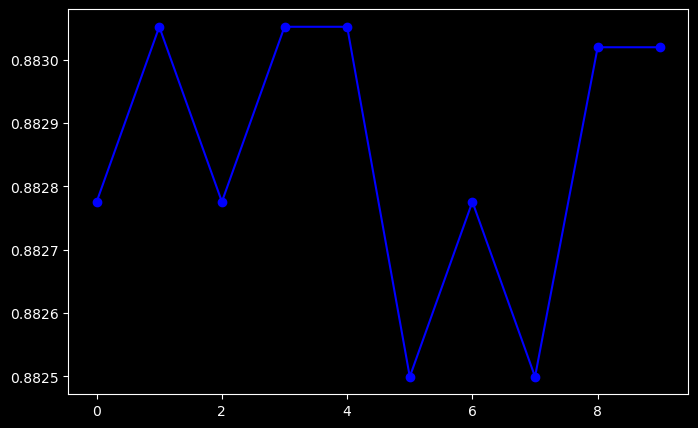

In [304]:
plt.figure(figsize=(8, 5))
plt.plot(scores, marker='o', linestyle='-', color='b')

Now choose a single metric to perform a grid search on the `max_depth` of the tree.

In [ ]:
# Grid search

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [ ]:
# Test metrics

What are your observation?  
By looking at the metric results, what is strange? Or at the opposite, obvious?

From theses observations, what are your conclusions?  
In the next sessions, we will look at ensembling to improve performances. But what should you be suspicious? What are the potential risks you identified?  

Propose something, continue to the next section and change your conclusions if you need.

### Introducing Ensemble Learning with Bagging models.

Let's train multiple classifiers in parallel in a bootstraping approach! 

Bagging stands for ***Boostrap AGGregatING***.

The following [post](https://blog.octo.com/les-methodes-ensemblistes-pour-algorithmes-de-machine-learning/) will give you an overview of these methods and their advantages and drawbacks

**The train test split using a seed equals to 42 will be used in the following part**

In [ ]:
# train_test split (you can copy paste the previously declared cell)
# X_train, X_test, y_train, y_test = None

#### Using Random Forest

The concept of random forest is explained in this [post](https://medium.com/analytics-vidhya/understanding-the-random-forest-algorithm-79b87bdde79a).

Now the best parameters of the previous classifier will be used in a using a bagging classifier
[sklearn : Random Forest Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)

We will use grid search on the `n_estimators` and `max_depth` parameters. 

In [ ]:
# gridsearch for the Random Forest classifier
#

How much estimators should we use for obtaining an optimal result? (in terms of time and performance)

*answer here*

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [ ]:
# Test metrics

#### Other Random Forest effect

The random forest model can attribute an importance value to features, [explanations here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

Let's train another random forest and display an histogramm with it :

In [ ]:
# training and display features' importance.
# tell them to use the RandomForest Object

What is the most important feature?

*Answer here*

A lot of features have low importance and probably add noise which reduce the performance of the classifier, do a feature selection by recursive elemination to automatically select the subset of features that gives you the best model predictions.

You can have a look at : 

https://scikit-learn.org/stable/modules/feature_selection.html

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [ ]:
# Feature selection with recursive elimination
# Do another grid search on your model with the subset of selected features

We removed the duration feature in our dataset

Read this feature description on the dataset description ([here on data.world](https://data.world/uci/bank-marketing) or [here on kaggle](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)).

How would the previously trained models perform with this feature?

*Answer here*

### Continue Ensemble Learning with boosting techniques

Bagging permits to average the results of separated models, whereas the boosting technique trains a classifier and optimizes it in function of its error.

Some information about boosting techniques are on the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) but a commonly used library for these techniques is [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) there are some compatibilities with the sklearn methods (gridsearch, cross validation,...)

- install the `xgboost` package

*Read the articles in resources for a complete explanation.*

In this part a classifier will be trained and evaluated.

In [ ]:
# use the same split and seed than you used before
# normally, you have nothing to code here :D 

*Hint:* An example for integrating `XGBoost` with  the `sklearn` tools is available [here](https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a)

In [ ]:
import xgboost as xgb

Let's build a new model than before with a grid search on the `n_estimators` and `max_depth` parameters.

In [ ]:
# model building and evaluation

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [ ]:
# Test metrics

In [ ]:
# performance curves

## Let's Conclude

Report your test set metrics for the three methods here

In [ ]:
# Decision Tree on test set

In [ ]:
# Random forest on test set

In [ ]:
# XGBoost on test set

What do you notice? What are you real conclusion about the dataset? What should you tell the client about the dataset and his problem?

*answer here*

- Write your memo about bagging and boosting method in a cell below.
- Which model would you choose for the bank, and why? Which precautions?

you can add your models result visualization in this cell if it helps you explaining your conclusions.

                                 `write memo here`

## To go further

### Build a customized bagging classifier (Optional) 

- Use a different classification model you have seen until now and build a new classifier based on the [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) to create and train an new model.
- Use differents classification models and use the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) to create and train an new model.

In [ ]:
# Write your code here

## Rebalance the data if you haven't done it yet

Before going through the modelling phase, let's see the label distribution :

Use the `value_counts` function and the appropriate visualization for displaying the label distribution

In [ ]:
# code here

What do you notice?

*answer here*

The easiest way to rebalance your data is to add the `class_weight='balanced'` parameter to your scikit learn model. The `class_weight` parameter is available in most scikit-learn models, for example look at the Decision Trees doc :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

(There are other techniques for rebalancing the data [here](https://blog.octo.com/donnees-desequilibrees-que-faire/), [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) ).

Rebalance the data with the `class_weight` parameter, and you'll have much better f1 and Average Precision metrics.

In [ ]:
# code here